In [ ]:
#Nombres:  David Yahaziel Díaz Guillén      2109534
#          Alan Giovanni García Osorio      2109282
#          Mariela Bulbarela Vazquez        2109277
#          Norma Guadalupe Barrón Rodríguez 1999687
#          Jonathan Ramón Cabrera           2020547
#
#Clase: Inteligencia Artificial.    Hora:N1

## **PIA.- Entrenamiento de una red neuronal convolucional.**

In [ ]:
!pip install kaggle

In [ ]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yahaziel23","key":"aa56c5d2a78e967ee2e14ae8a1aa362e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
 99% 1.17G/1.17G [00:15<00:00, 75.5MB/s]
100% 1.17G/1.17G [00:15<00:00, 83.1MB/s]


In [ ]:
!unzip labeled-chest-xray-images.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2655558-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2659844-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-0001.jpeg  
  inflating: chest_xray/train/NORMAL/N

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos y normalizar las imágenes (valores entre 0 y 1)
datagen = ImageDataGenerator(rescale=1./255)

# Tamaño de las imágenes
img_size = 224

# Generador para los datos de entrenamiento
train_generator = datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary')

# Generador para los datos de prueba
test_generator = datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary')



Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


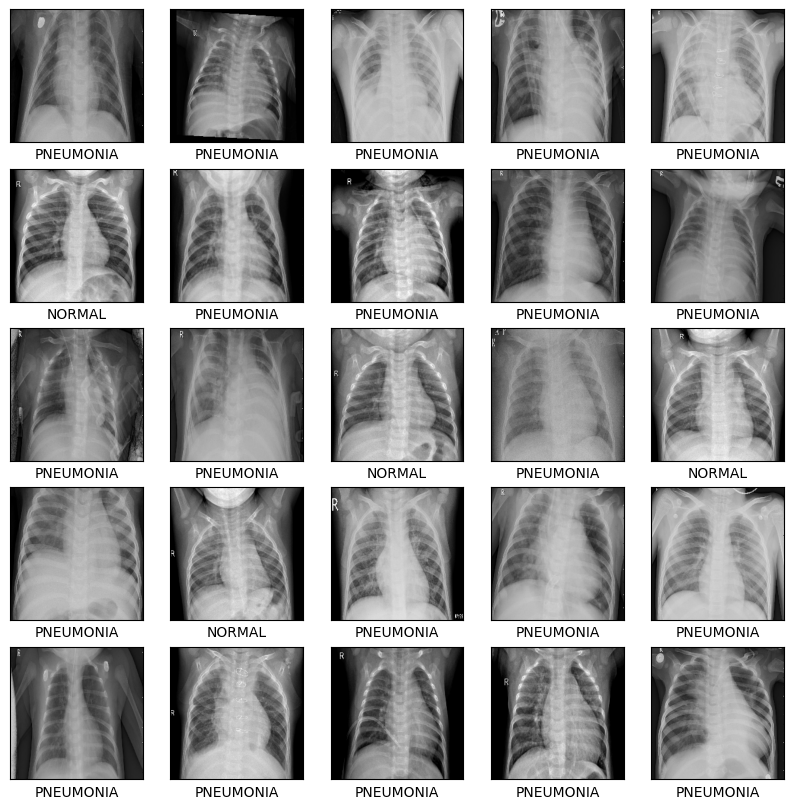

In [ ]:
# Mostrar 25 imagenes aleatorias
images, labels = next(train_generator)

indices = random.sample(range(len(images)), 25)

plt.figure(figsize=(10,10))
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[idx])
    class_name = list(train_generator.class_indices.keys())[int(labels[idx])]
    plt.xlabel(class_name)
plt.show()


In [ ]:
# Crear el modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 173056)           

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
164/164 [==============================] - 593s 4s/step - loss: 0.0911 - accuracy: 0.9641 - val_loss: 0.4188 - val_accuracy: 0.8510
Epoch 2/10
164/164 [==============================] - 580s 4s/step - loss: 0.0497 - accuracy: 0.9809 - val_loss: 0.9971 - val_accuracy: 0.7837
Epoch 3/10
164/164 [==============================] - 578s 4s/step - loss: 0.0436 - accuracy: 0.9838 - val_loss: 1.0081 - val_accuracy: 0.8285
Epoch 4/10
164/164 [==============================] - 568s 3s/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.7707 - val_accuracy: 0.8413
Epoch 5/10
164/164 [==============================] - 571s 3s/step - loss: 0.0467 - accuracy: 0.9822 - val_loss: 0.4427 - val_accuracy: 0.8526
Epoch 6/10
164/164 [==============================] - 567s 3s/step - loss: 0.0509 - accuracy: 0.9795 - val_loss: 1.1418 - val_accuracy: 0.7853
Epoch 7/10
164/164 [==============================] - 573s 3s/step - loss: 0.2748 - accuracy: 0.9321 - val_loss: 0.6532 - val_accuracy: 0.8269

In [ ]:
# Predicciones
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
#Predicción 1
x = np.argmax(predictions[5])
y = test_labels[5]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

1/1 [==============================] - 2s 2s/step
La red dice que la imagen es clase 1 y la clase verdadera es: 1.0


In [ ]:
#Predicción 2
x = np.argmax(predictions[24])
y = test_labels[24]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase 1 y la clase verdadera es: 0.0


In [ ]:
#Predicción 3
x = np.argmax(predictions[-5])
y = test_labels[-5]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase 0 y la clase verdadera es: 0.0


In [ ]:
#Predicción 4
x = np.argmax(predictions[15])
y = test_labels[15]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase 0 y la clase verdadera es: 0.0


In [ ]:
#Predicción 5
x = np.argmax(predictions[-15])
y = test_labels[-15]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase 1 y la clase verdadera es: 1.0


20/20 - 29s - loss: 1.0056 - accuracy: 0.8349 - 29s/epoch - 1s/step


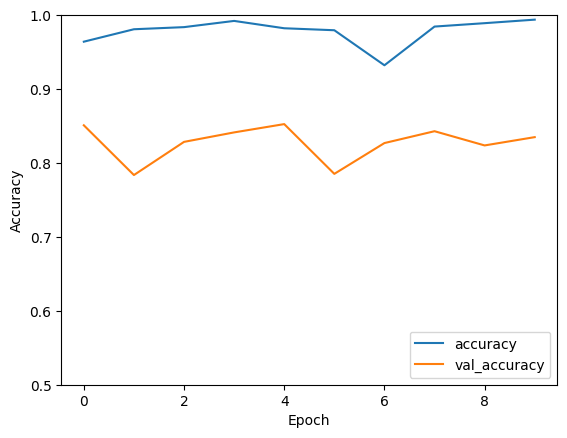

In [ ]:
#Evaluar modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [ ]:
print(test_acc)

0.8349359035491943
